In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [182]:
bank = pd.read_csv(r"C:\Users\ayush\Downloads\bank--full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [183]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [184]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [185]:
bank["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [186]:
bank.shape

(45211, 17)

In [187]:
bank = bank.dropna()
bank.shape

(45211, 17)

In [188]:
bank1 = bank.copy()

In [189]:
#converting all yes/no into 1/0
bank1.y.replace(("yes","no"),(1,0),inplace = True)
bank1.default.replace(("yes","no"),(1,0),inplace = True)
bank1.housing.replace(("yes","no"),(1,0),inplace = True)
bank1.loan.replace(("yes","no"),(1,0),inplace = True)

In [190]:
# creating dummies for object data
bank1 = pd.get_dummies(bank1)
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


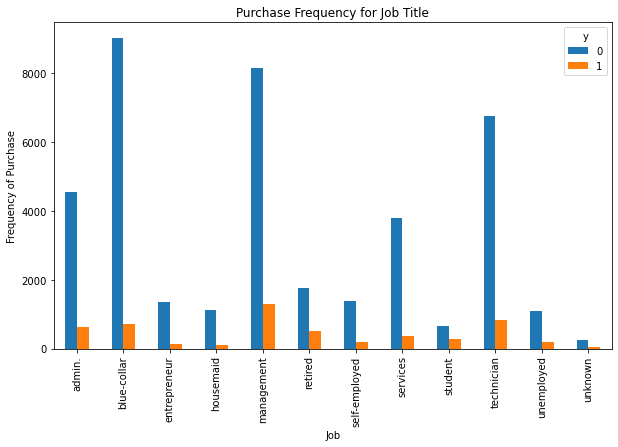

In [192]:
table=pd.crosstab(bank.job,bank1.y).plot(kind='bar',figsize=(10, 6))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

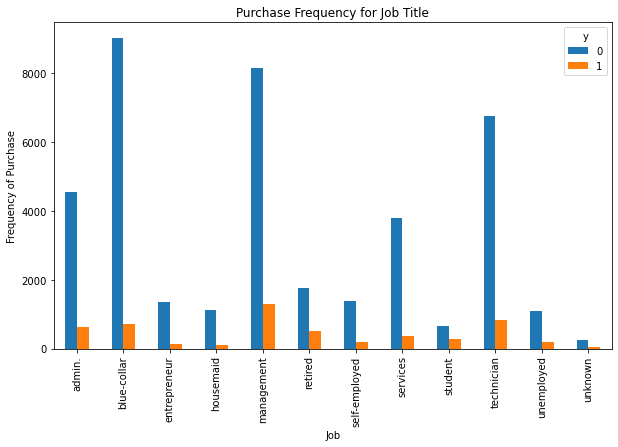

In [195]:
table=pd.crosstab(bank.job,bank1.y).plot(kind='bar',figsize=(10, 6))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

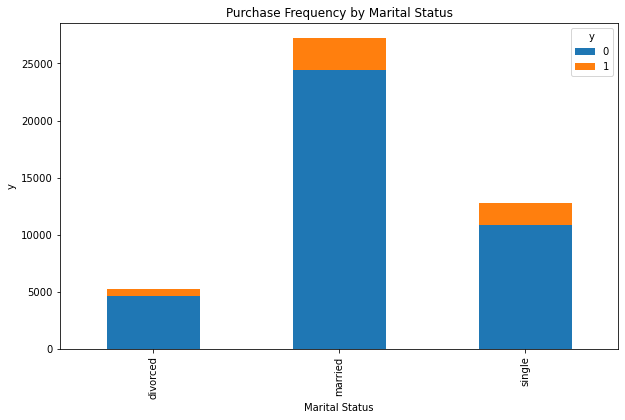

In [194]:
table = pd.crosstab(bank.marital, bank1.y)
table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_marital_stacked_bar')
plt.show()

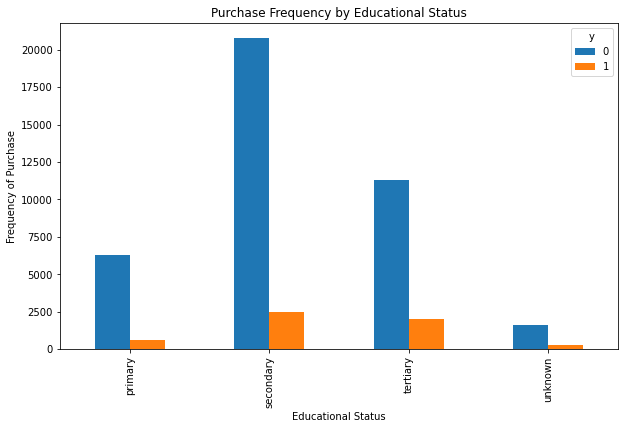

In [144]:
table = pd.crosstab(bank.education, bank1.y)
table.plot(kind='bar', figsize=(10, 6))
plt.title('Purchase Frequency by Educational Status')
plt.xlabel('Educational Status')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_marital_grouped_bar')
plt.show()

In [161]:
#dividing the datasets into X and Y variables
X = bank1.loc[:,bank1.columns!='y']
Y = np.ravel(bank1.loc[:,bank1.columns=='y'])

In [162]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [163]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [164]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

LogisticRegression()

In [165]:
#Predict for X dataset
#classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [166]:
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})

In [167]:
y_pred_df[20:80]

,actual,predicted
20,0,0
21,0,0
22,0,0
23,0,0
24,0,0
25,0,0
26,0,0
27,0,0
28,0,0
29,0,0


In [168]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
#display(y_pred_df[20:80])
y_pred_df['correct'].mean()
#y_pred_df['correct'].value_counts()


0.8915750591670168

In [169]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39156   766]
 [ 4136  1153]]


In [170]:
395 / (123 + 395)

0.7625482625482626

In [171]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



0.5994061031982683

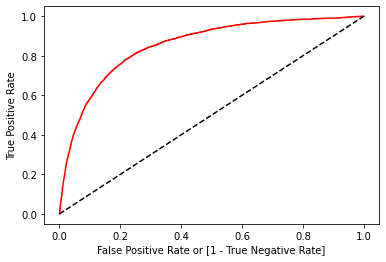

In [179]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
auc